# COVID-19 Sectional Data Dashboard

This Dashboard shows three data: the number of patients who had been diagnosed with COVID-19 and had been hospitalized(admission in hospital); COVID occupied mechanical ventilator beds(MVOccupiedcount) and total admission in England. The source of these data is Public Health England(PHE). These three data are expected to be used to compare the number of hospital admissions with the number of ventilators used, and to compare the total number of diagnoses with the number of hospital admissions

In [1]:
#codes to activate ipywidgets library and pandas library to add interactive control and generate graphs.
from IPython.display import clear_output
import ipywidgets as wdg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from uk_covid19 import Cov19API

%matplotlib inline
# control the size of figures
plt.rcParams['figure.dpi'] = 100

In [2]:
#Load Required Data from PHE and stroed thenm in json style
from uk_covid19 import Cov19API
import json

filter=[
    'areaType=nation',
    'areaName=England'
]

structure = {
    "date": "date",
    "MVOccupiedcount": "covidOccupiedMVBeds",
    "Totalcases": "cumCasesByPublishDate",
    "AdmissioninHospital":"hospitalCases"
}
api = Cov19API(filters=filter, structure=structure)
admission_data=api.get_json()

In [3]:
# save data in .json file
import json
with open ("admission_data.json", "wt") as OUTF:
    json.dump(admission_data, OUTF)

# Refresh data

Click the following button to update the latest data.

In [4]:
def access_api(button):
    from uk_covid19 import Cov19API
    import json
    apibutton.icon="check"
    apibutton.disabled=True


apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='',
    tooltip='Click to download current Public Health England data',
    icon='download'
)

apibutton.on_click(access_api)
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

# Data Frame

Here is a frame to list the data stored in .json file. The following logarithm graph is generated from this frame.

In [5]:
import json
with open("admission_data.json", "rt") as infile:
    data=json.load(infile)

# extract values for the x axis
dataDictionary=data['data']
dates=[dictionary['date'] for dictionary in dataDictionary]
dates.sort()

In [6]:
def parse_date(datestring):
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])  

In [7]:
# create data frame
index=pd.date_range(startdate, enddate, freq='D')
admissionFrame=pd.DataFrame(index=index, columns=['MVOccupiedcount','AdmissioninHospital','Totalcases'])

In [8]:
# import data
for entry in dataDictionary: 
    date=parse_date(entry['date'])
    for column in ['Totalcases','MVOccupiedcount','AdmissioninHospital']:
        if pd.isna(admissionFrame.loc[date, column]):
            value= float(entry[column]) if entry[column]!=None else 0.0
            admissionFrame.loc[date, column]=value
            
admissionFrame.fillna(0.0, inplace=True)
admissionFrame

,MVOccupiedcount,AdmissioninHospital,Totalcases
2020-01-31,0.0,0.0,2.0
2020-02-01,0.0,0.0,2.0
2020-02-02,0.0,0.0,2.0
2020-02-03,0.0,0.0,2.0
2020-02-04,0.0,0.0,2.0
...,...,...,...
2023-12-03,0.0,0.0,21011798.0
2023-12-04,0.0,0.0,21011798.0
2023-12-05,0.0,0.0,21011798.0
2023-12-06,0.0,0.0,21011798.0


Here is a logarithm graph to display data.

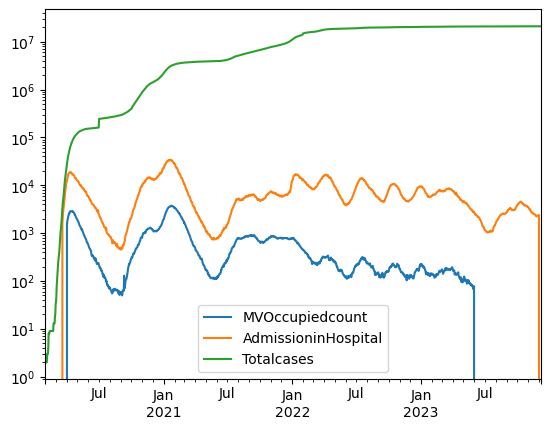

In [9]:
admissionFrame.plot(logy=True) 
admissionFrame.to_pickle("admissionFrame.pkl") #save data to pickle file.

# Graphs and Analysis

Description:This part displays the refreshed data in the form of linear graph and logarithmic graph. Users can choose the graph they need according to their needs, and users can also choose to dispay the data which they need.Linear graph can show trends in data to aid comparison. Logarithmic graph can show the relationship between data and help analyze whether there is some correlation between the data.

Guidence:In 'Stats', users can select data for graph. When users want to select multiple data, the users need to hold the ‘Ctrl’ key and click on the required data with the mouse. In line charts, it is not recommended to display ‘Total cases’ data together with the other two data. In 'Scale', 'linear' for linear graph, 'log' for logrithmic graph.

In [10]:
series=wdg.SelectMultiple(
    options=['MVOccupiedcount', 'Totalcases','AdmissioninHospital'],
    value=['MVOccupiedcount', 'Totalcases','AdmissioninHospital'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
    description='Scale:',
    disabled=False
)


controls=wdg.HBox([series, scale])

def admission_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        admissionFrame[list(gcols)].plot(logy=logscale)
        plt.show()  
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

graph=wdg.interactive_output(admission_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()